In [3]:
import pdb
import numpy as np
from aesindy.solvers import SynthData
from aesindy.training import TrainModel
from default_params import params

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"



In [76]:

params['model'] = 'pendulum'
params['case'] = 'basic'
params['system_coefficients'] = [10, 10]
params['noise'] = 0.0
params['input_dim'] = 80
params['dt'] = np.sqrt(params['system_coefficients'][0]/params['system_coefficients'][1])/10
params['tend'] = 30
params['n_ics'] = 35
params['poly_order'] = 1
params['include_sine'] = True
params['fix_coefs'] = False

params['save_checkpoints'] = True 
params['save_freq'] = 1 

params['print_progress'] = True
params['print_frequency'] = 5 

# training time cutoffs
params['max_epochs'] = 3000
params['patience'] = 70 

# loss function weighting
params['loss_weight_rec'] = 0.3
params['loss_weight_sindy_z'] = 0.001 
params['loss_weight_sindy_x'] = 0.001
params['loss_weight_sindy_regularization'] = 1e-5
params['loss_weight_integral'] = 0.1  
params['loss_weight_x0'] = 0.01 
params['loss_weight_layer_l2'] = 0.0
params['loss_weight_layer_l1'] = 0.0 



In [77]:

S = SynthData(model=params['model'], 
                args=params['system_coefficients'], 
                noise=params['noise'], 
                input_dim=params['input_dim'], 
                normalization=params['normalization'])
S.run_sim(params['n_ics'], params['tend'], params['dt'])

100%|██████████| 35/35 [00:00<00:00, 181.75it/s]

generating solutions..


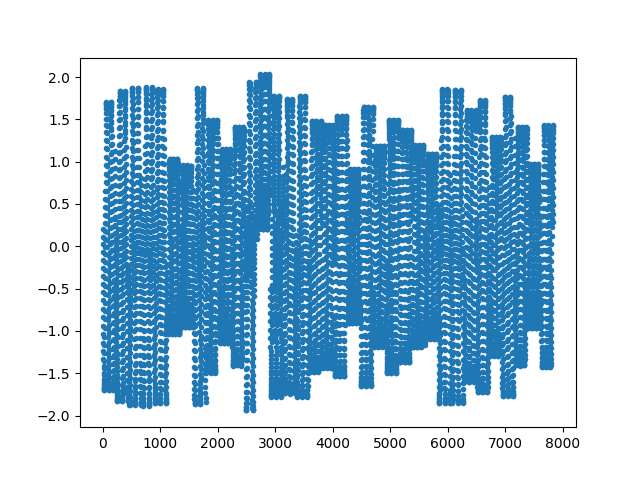

In [79]:
%matplotlib widget
import matplotlib.pyplot as plt

S.z.shape
fig = plt.figure()
plt.plot(S.z[:, 1], '.')
plt.show()

In [80]:
S.t[1]-S.t[0]

0.09899494936611666